In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score,roc_curve,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

# Problem 1:

## You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

In [37]:
df = pd.read_excel("Election_Data.xlsx","Election_Dataset_Two Classes")

## 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)

In [38]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [39]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [40]:
df=df.drop('Unnamed: 0',axis=1)

In [41]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [43]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [45]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [46]:
df.drop_duplicates(inplace=True) 

In [47]:
dups=df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
df[dups]

Total no of duplicate values = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [48]:
df.shape

(1517, 9)

In [49]:
df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

In [50]:
for feature in df.columns:
    if df[feature].dtype=='object':
           print(feature.upper() ," ",df[feature].nunique())
           print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


## 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. (7 Marks)

## Univariate Analysis

In [51]:
#AGE
print('Range of values: ', df['age'].max()-df['age'].min())
print('Minimum age: ', df['age'].min())
print('Maximum age: ',df['age'].max())
print('Mean value: ', df['age'].mean())
print('Median value: ',df['age'].median())
print('Standard deviation: ', df['age'].std())
print('Null values: ',df['age'].isnull().any())

Range of values:  69
Minimum age:  24
Maximum age:  93
Mean value:  54.2412656558998
Median value:  53.0
Standard deviation:  15.701740504206489
Null values:  False


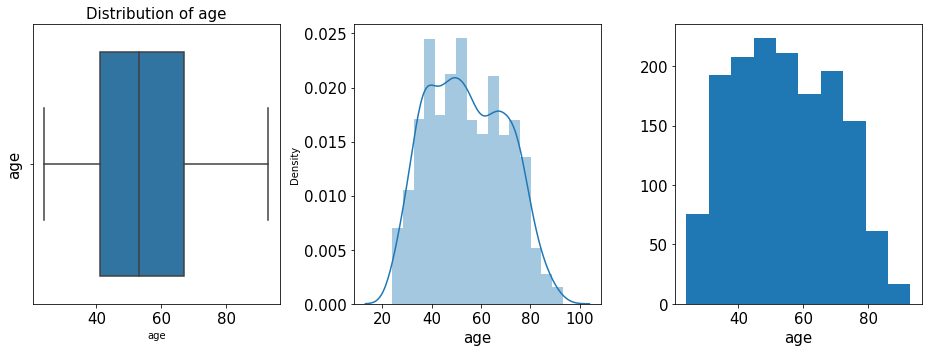

In [52]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=df,orient='v',ax=ax1)
ax1.set_ylabel('age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['age'],ax=ax2)
ax2.set_xlabel('age', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['age'])
ax3.set_xlabel('age', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [53]:
#economic.cond.national
print('Range of values: ', df['economic.cond.national'].max()-df['economic.cond.national'].min())
print('Minimum economic.cond.national: ', df['economic.cond.national'].min())
print('Maximum economic.cond.national: ',df['economic.cond.national'].max())
print('Mean value: ', df['economic.cond.national'].mean())
print('Median value: ',df['economic.cond.national'].median())
print('Standard deviation: ', df['economic.cond.national'].std())
print('Null values: ',df['economic.cond.national'].isnull().any())

Range of values:  4
Minimum economic.cond.national:  1
Maximum economic.cond.national:  5
Mean value:  3.245220830586684
Median value:  3.0
Standard deviation:  0.8817924638047195
Null values:  False


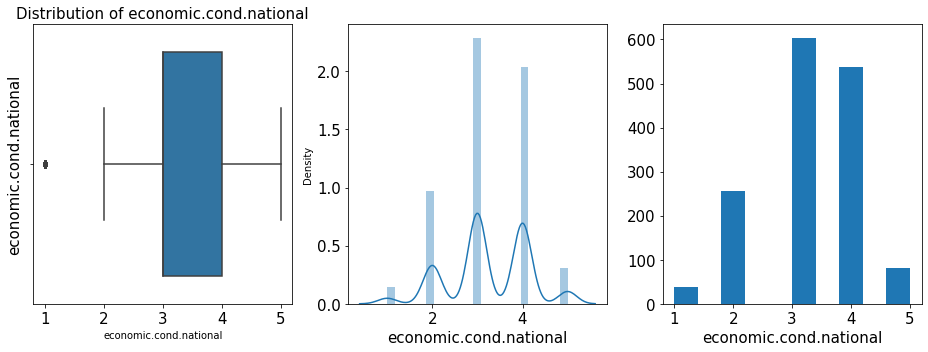

In [54]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.national',data=df,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.national', fontsize=15)
ax1.set_title('Distribution of economic.cond.national', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['economic.cond.national'],ax=ax2)
ax2.set_xlabel('economic.cond.national', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['economic.cond.national'])
ax3.set_xlabel('economic.cond.national', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [55]:
#economic.cond.household
print('Range of values: ', df['economic.cond.household'].max()-df['economic.cond.household'].min())
print('Minimum economic.cond.household: ', df['economic.cond.household'].min())
print('Maximum economic.cond.household: ',df['economic.cond.household'].max())
print('Mean value: ', df['economic.cond.household'].mean())
print('Median value: ',df['economic.cond.household'].median())
print('Standard deviation: ', df['economic.cond.household'].std())
print('Null values: ',df['economic.cond.household'].isnull().any())

Range of values:  4
Minimum economic.cond.household:  1
Maximum economic.cond.household:  5
Mean value:  3.1377719182597232
Median value:  3.0
Standard deviation:  0.9310694297616856
Null values:  False


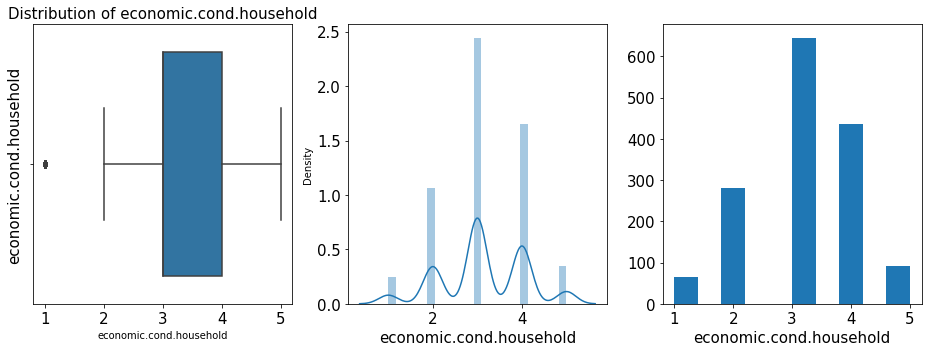

In [56]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='economic.cond.household',data=df,orient='v',ax=ax1)
ax1.set_ylabel('economic.cond.household', fontsize=15)
ax1.set_title('Distribution of economic.cond.household', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['economic.cond.household'],ax=ax2)
ax2.set_xlabel('economic.cond.household', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['economic.cond.household'])
ax3.set_xlabel('economic.cond.household', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [57]:
#Blair
print('Range of values: ', df['Blair'].max()-df['Blair'].min())
print('Minimum Blair: ', df['Blair'].min())
print('Maximum Blair: ',df['Blair'].max())
print('Mean value: ', df['Blair'].mean())
print('Median value: ',df['Blair'].median())
print('Standard deviation: ', df['Blair'].std())
print('Null values: ',df['Blair'].isnull().any())

Range of values:  4
Minimum Blair:  1
Maximum Blair:  5
Mean value:  3.3355306526038233
Median value:  4.0
Standard deviation:  1.1747718854032745
Null values:  False


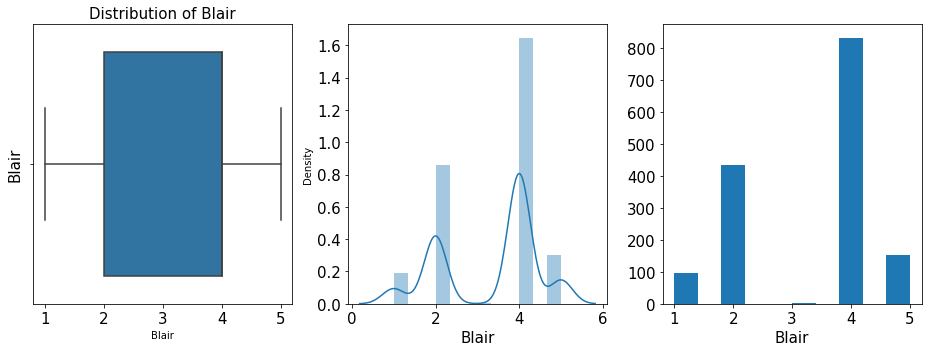

In [58]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Blair',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Blair', fontsize=15)
ax1.set_title('Distribution of Blair', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Blair'],ax=ax2)
ax2.set_xlabel('Blair', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Blair'])
ax3.set_xlabel('Blair', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [59]:
#Hague
print('Range of values: ', df['Hague'].max()-df['Hague'].min())
print('Minimum Hague: ', df['Hague'].min())
print('Maximum Hague: ',df['Hague'].max())
print('Mean value: ', df['Hague'].mean())
print('Median value: ',df['Hague'].median())
print('Standard deviation: ', df['Hague'].std())
print('Null values: ',df['Hague'].isnull().any())

Range of values:  4
Minimum Hague:  1
Maximum Hague:  5
Mean value:  2.7495056031641396
Median value:  2.0
Standard deviation:  1.2324793557178417
Null values:  False


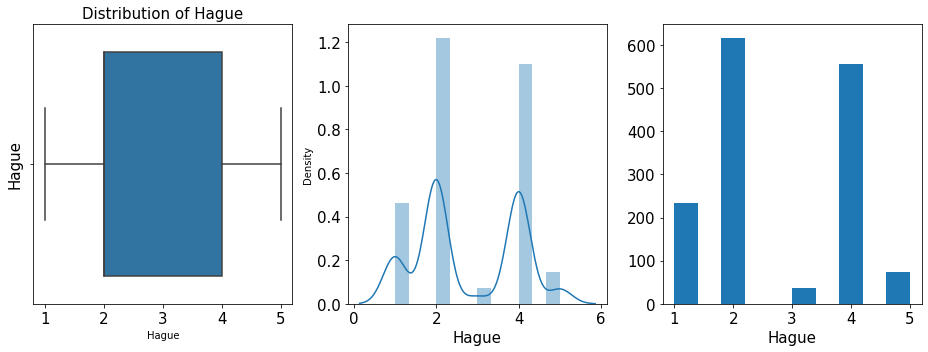

In [60]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Hague',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Hague', fontsize=15)
ax1.set_title('Distribution of Hague', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Hague'],ax=ax2)
ax2.set_xlabel('Hague', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Hague'])
ax3.set_xlabel('Hague', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [61]:
#Europe
print('Range of values: ', df['Europe'].max()-df['Europe'].min())
print('Minimum Europe: ', df['Europe'].min())
print('Maximum Europe: ',df['Europe'].max())
print('Mean value: ', df['Europe'].mean())
print('Median value: ',df['Europe'].median())
print('Standard deviation: ', df['Europe'].std())
print('Null values: ',df['Europe'].isnull().any())

Range of values:  10
Minimum Europe:  1
Maximum Europe:  11
Mean value:  6.7402768622280815
Median value:  6.0
Standard deviation:  3.299043305366668
Null values:  False


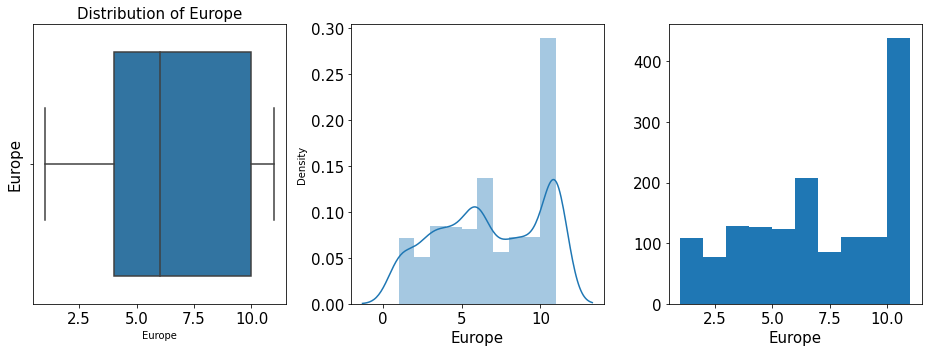

In [62]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='Europe',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Europe', fontsize=15)
ax1.set_title('Distribution of Europe', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['Europe'],ax=ax2)
ax2.set_xlabel('Europe', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['Europe'])
ax3.set_xlabel('Europe', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [63]:
#political.knowledge
print('Range of values: ', df['political.knowledge'].max()-df['political.knowledge'].min())
print('Minimum political.knowledge: ', df['political.knowledge'].min())
print('Maximum political.knowledge: ',df['political.knowledge'].max())
print('Mean value: ', df['political.knowledge'].mean())
print('Median value: ',df['political.knowledge'].median())
print('Standard deviation: ', df['political.knowledge'].std())
print('Null values: ',df['political.knowledge'].isnull().any())

Range of values:  3
Minimum political.knowledge:  0
Maximum political.knowledge:  3
Mean value:  1.5405405405405406
Median value:  2.0
Standard deviation:  1.0844173188138866
Null values:  False


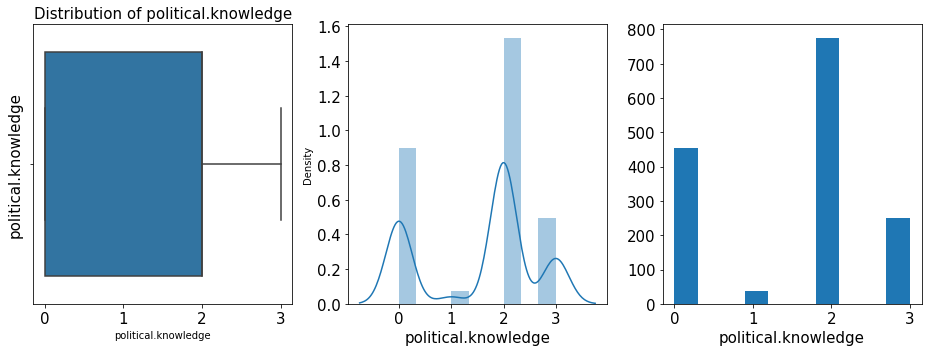

In [64]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='political.knowledge',data=df,orient='v',ax=ax1)
ax1.set_ylabel('political.knowledge', fontsize=15)
ax1.set_title('Distribution of political.knowledge', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['political.knowledge'],ax=ax2)
ax2.set_xlabel('political.knowledge', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['political.knowledge'])
ax3.set_xlabel('political.knowledge', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

In [65]:
df.skew().sort_values(ascending=False)

Hague                      0.146191
age                        0.139800
Europe                    -0.141891
economic.cond.household   -0.144148
economic.cond.national    -0.238474
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

<AxesSubplot:>

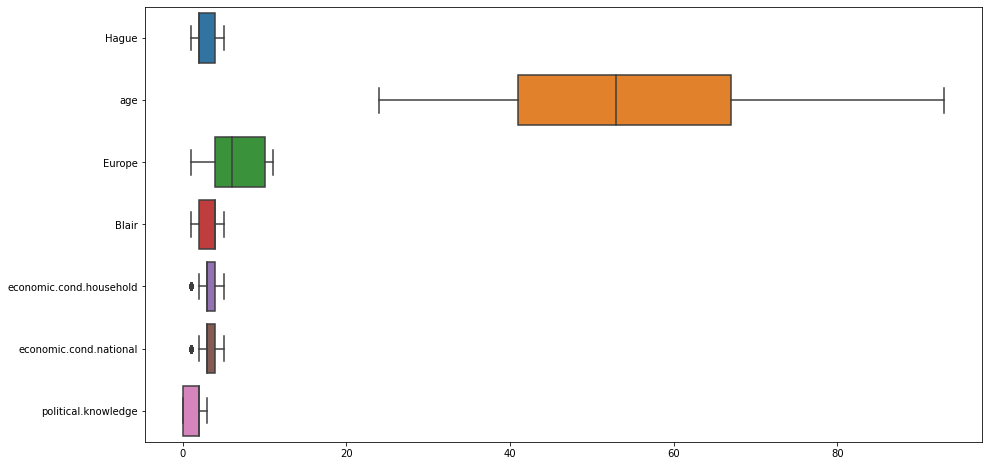

In [66]:
plt.figure(figsize=(15,8))  
sns.boxplot(data=df[['Hague','age','Europe','Blair','economic.cond.household','economic.cond.national',"political.knowledge"]] , orient='h')

## Bivariate and Multivariate Analysis

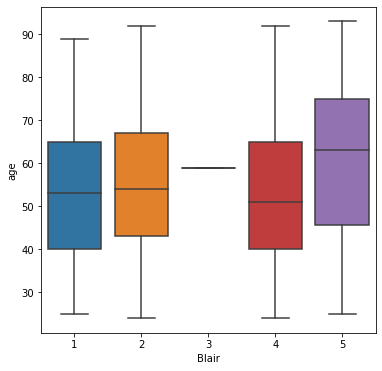

In [67]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='Blair', y='age')
plt.show()

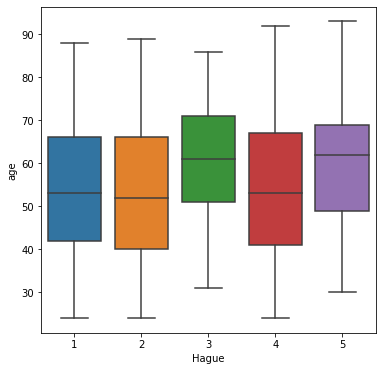

In [68]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='Hague', y='age')
plt.show()

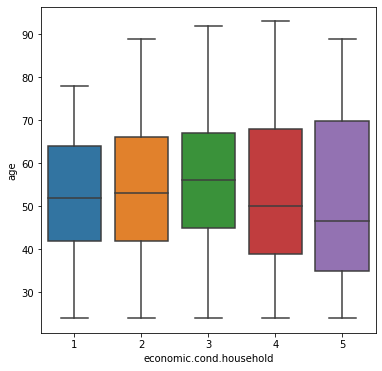

In [69]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='economic.cond.household', y='age')
plt.show()

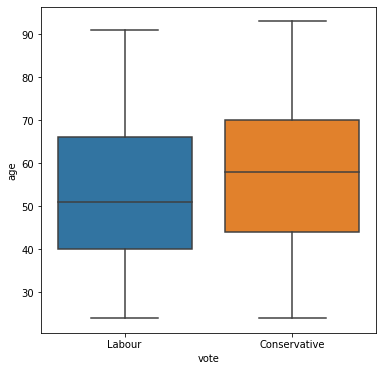

In [70]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x='vote', y='age')
plt.show()

<AxesSubplot:xlabel='Blair', ylabel='count'>

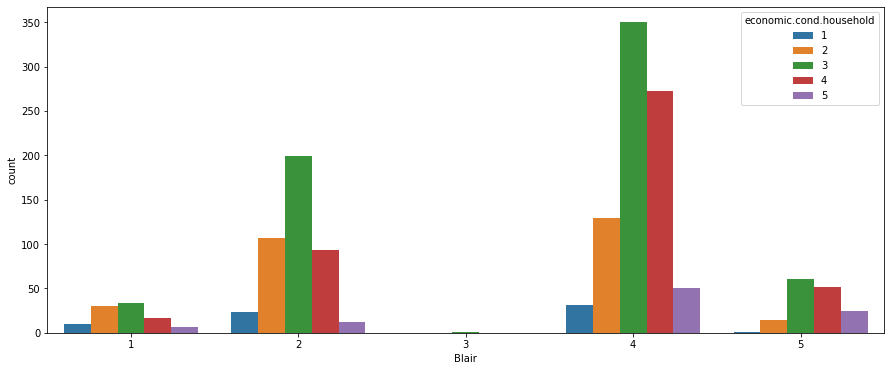

In [71]:
plt.figure(figsize=(15,6))
sns.countplot(x="Blair", hue="economic.cond.household", data=df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

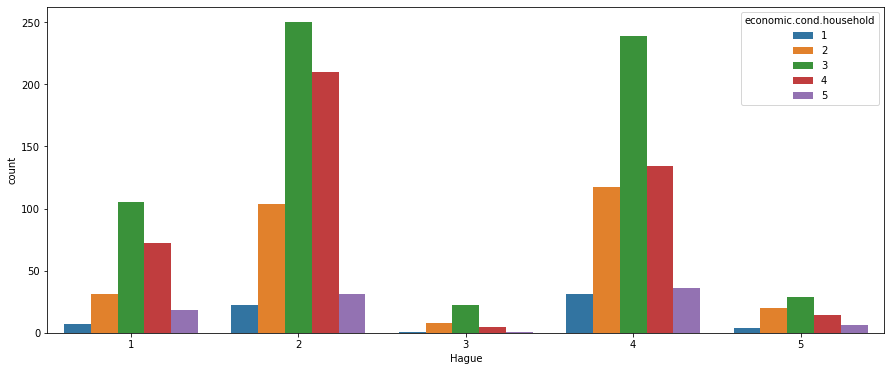

In [72]:
plt.figure(figsize=(15,6))
sns.countplot(x="Hague", hue="economic.cond.household", data=df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

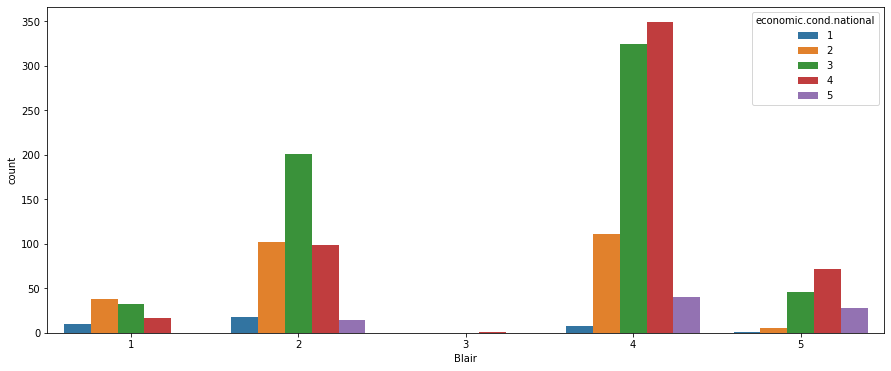

In [73]:
plt.figure(figsize=(15,6))
sns.countplot(x="Blair", hue="economic.cond.national", data=df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

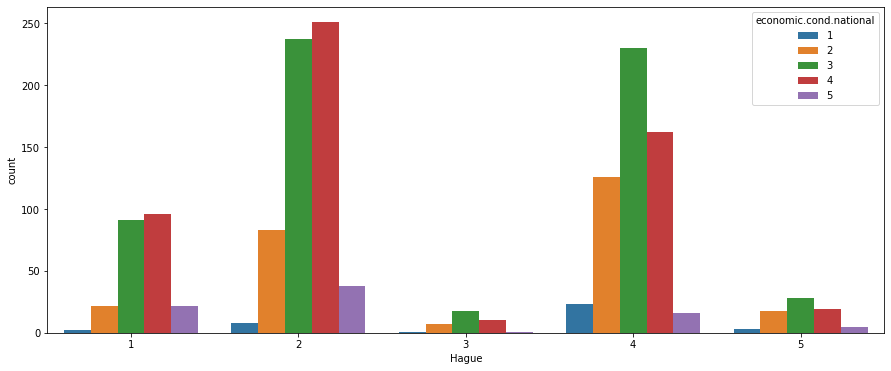

In [74]:
plt.figure(figsize=(15,6))
sns.countplot(x="Hague", hue="economic.cond.national", data=df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

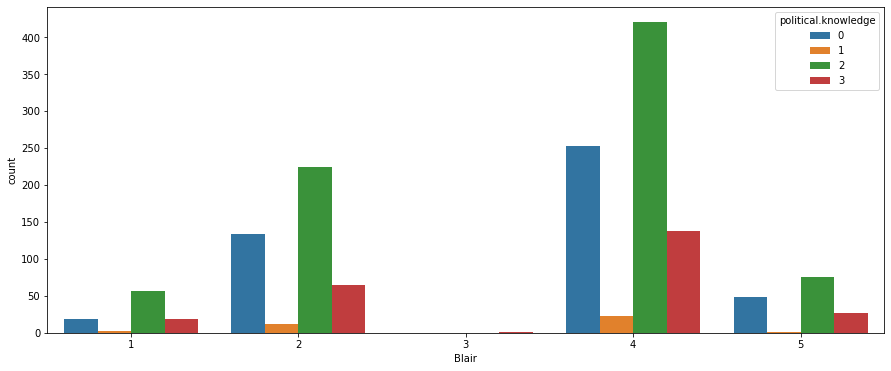

In [75]:
plt.figure(figsize=(15,6))
sns.countplot(x="Blair", hue="political.knowledge", data=df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

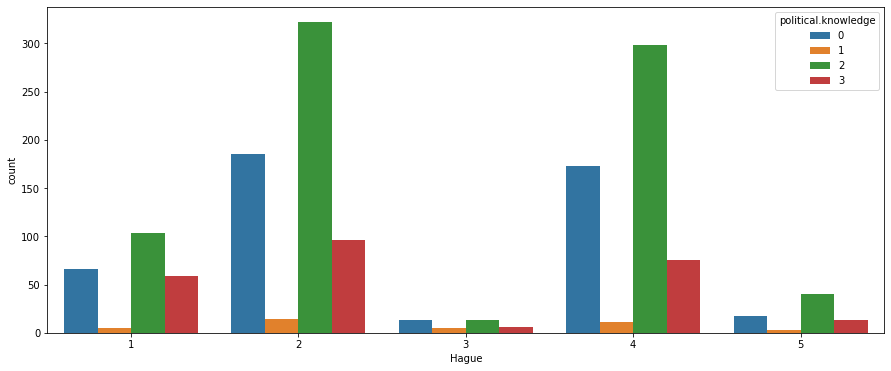

In [76]:
plt.figure(figsize=(15,6))
sns.countplot(x="Hague", hue="political.knowledge", data=df)

<AxesSubplot:xlabel='Blair', ylabel='count'>

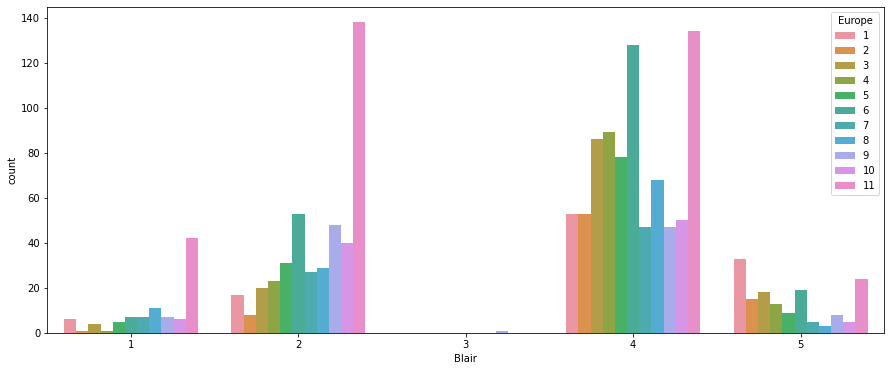

In [77]:
plt.figure(figsize=(15,6))
sns.countplot(x="Blair", hue="Europe", data=df)

<AxesSubplot:xlabel='Hague', ylabel='count'>

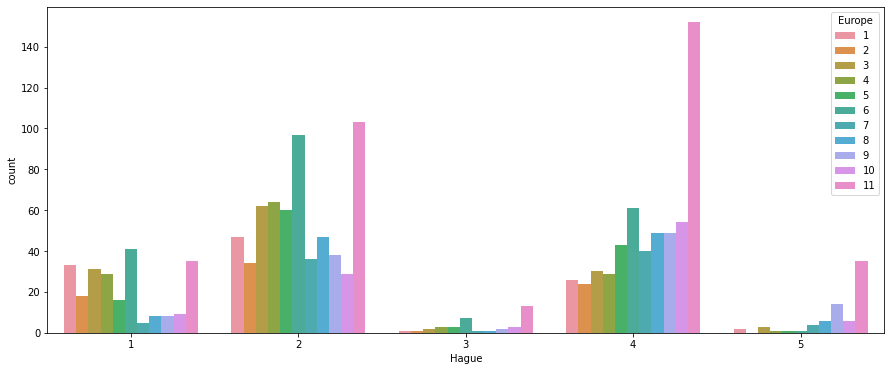

In [78]:
plt.figure(figsize=(15,6))
sns.countplot(x="Hague", hue="Europe", data=df)

<AxesSubplot:xlabel='vote', ylabel='count'>

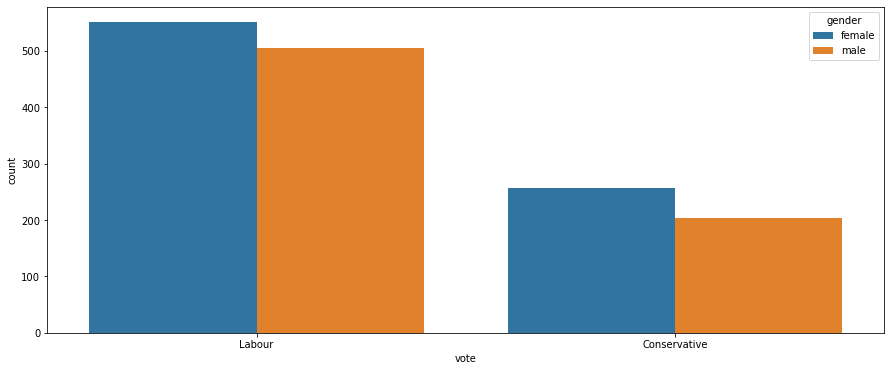

In [79]:
plt.figure(figsize=(15,6))
sns.countplot(x="vote", hue="gender", data=df)

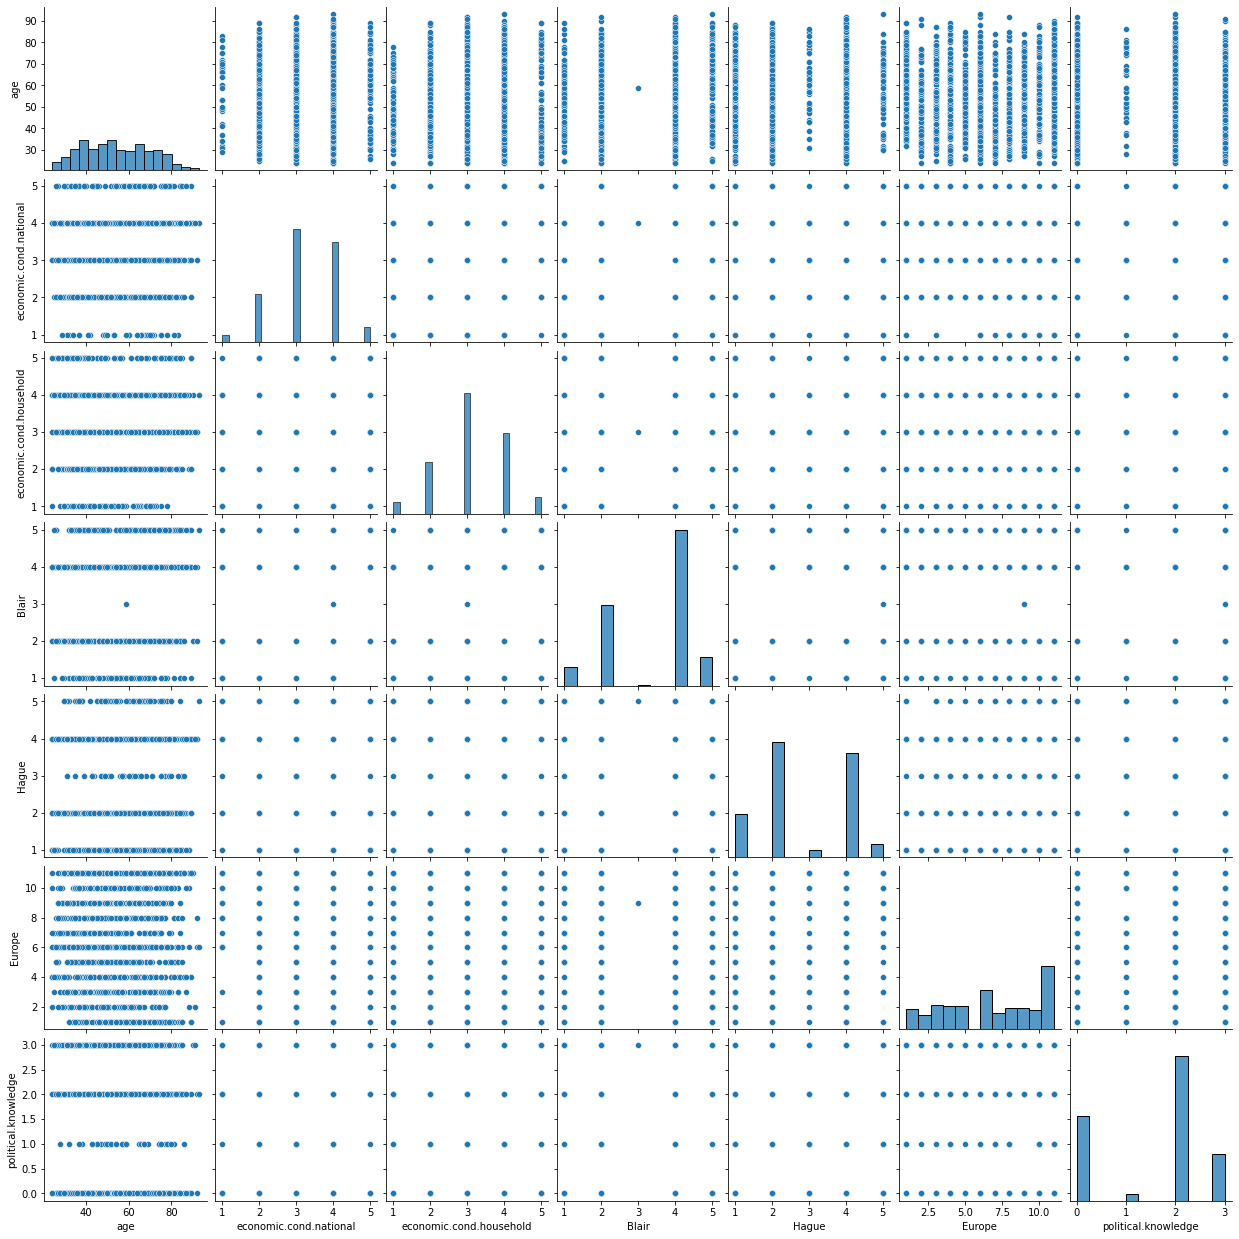

In [80]:
sns.pairplot(df)

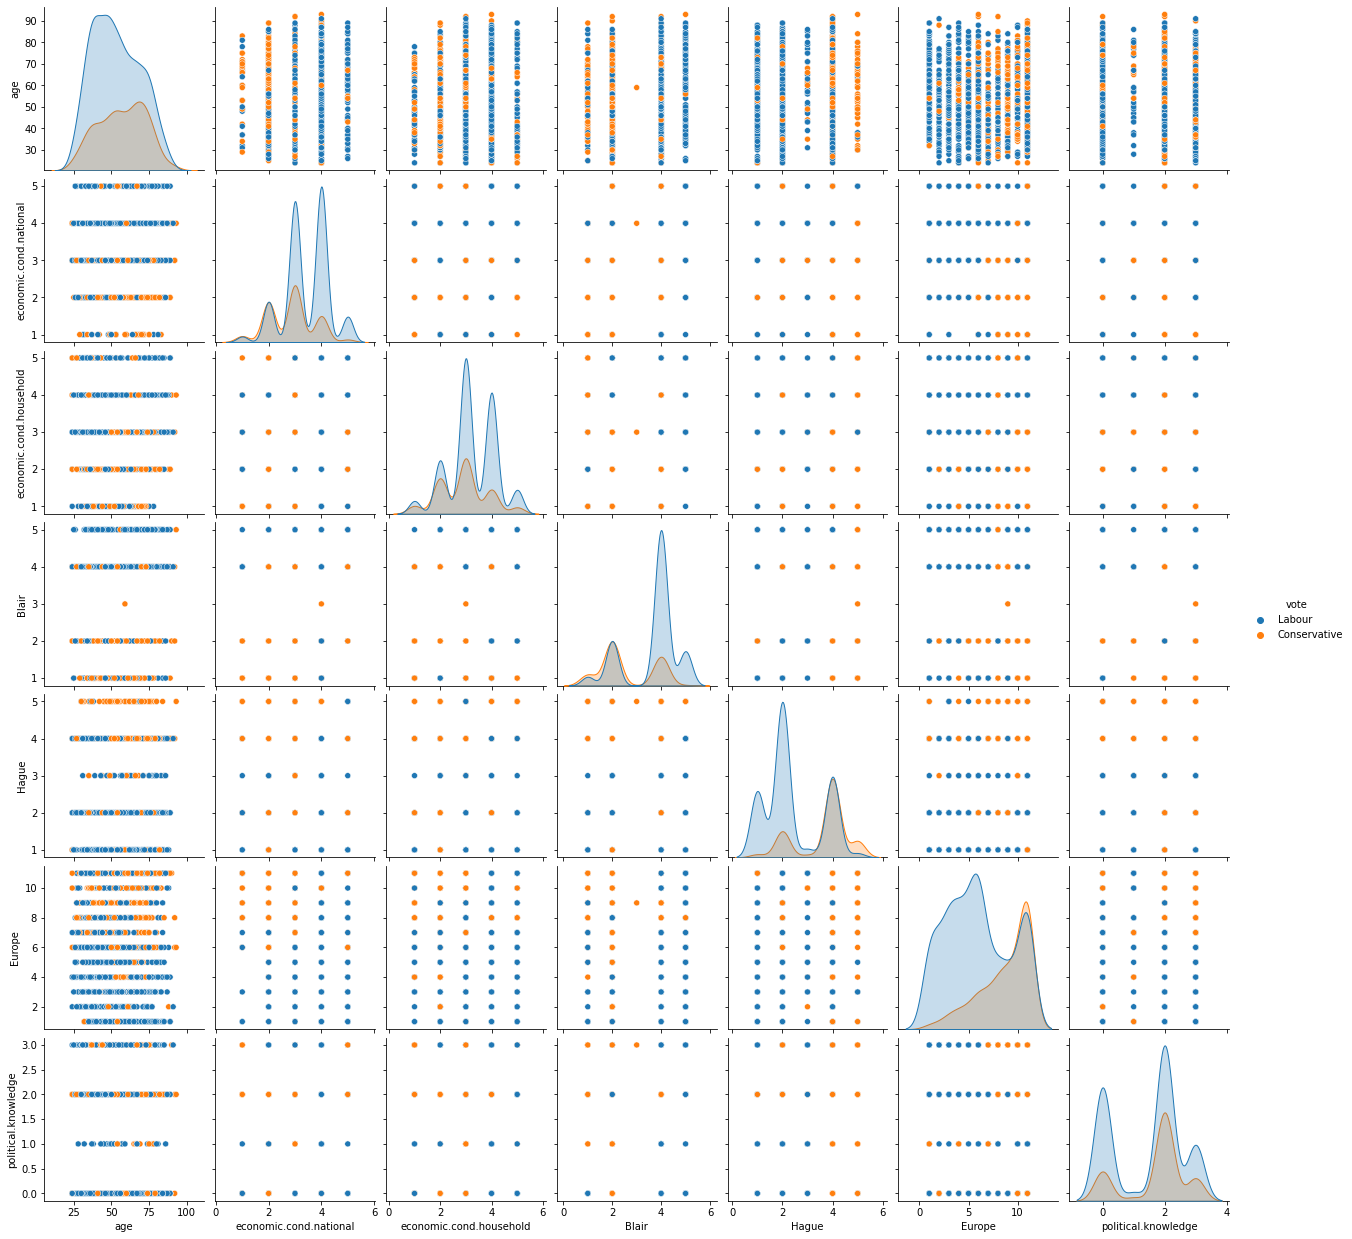

In [81]:
sns.pairplot(df, hue='vote')

<AxesSubplot:>

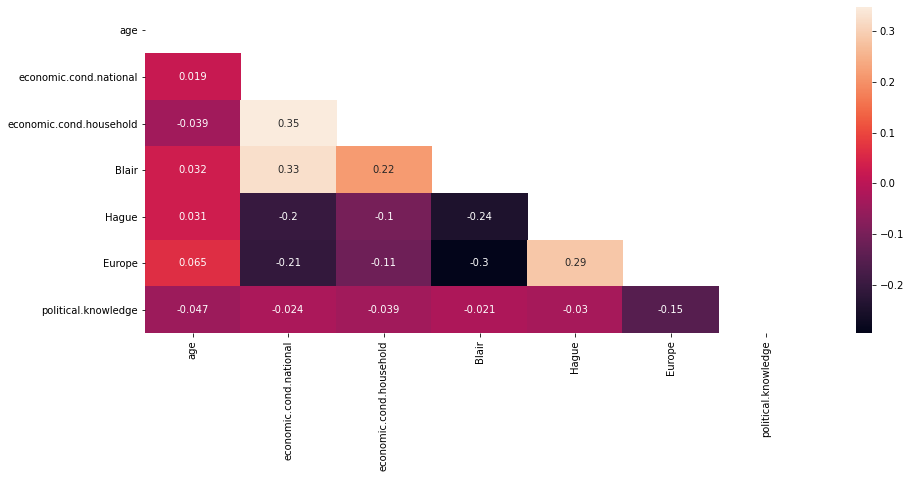

In [82]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,mask = np.triu(df.corr()))

In [83]:
def outlier_treatment(col):
    Q1,Q3=np.percentile(df[col],[25,75])
    IQR=Q3-Q1
    Qmax=Q3 + 1.5*IQR
    Qmin=Q1 - 1.5*IQR
    df[col]= np.where(df[col] > Qmax, Qmax, df[col] )
    df[col]= np.where(df[col] < Qmin, Qmin, df[col] )
    
for col in df.columns:
    if df[col].dtype != 'object':
        outlier_treatment(col)

<AxesSubplot:>

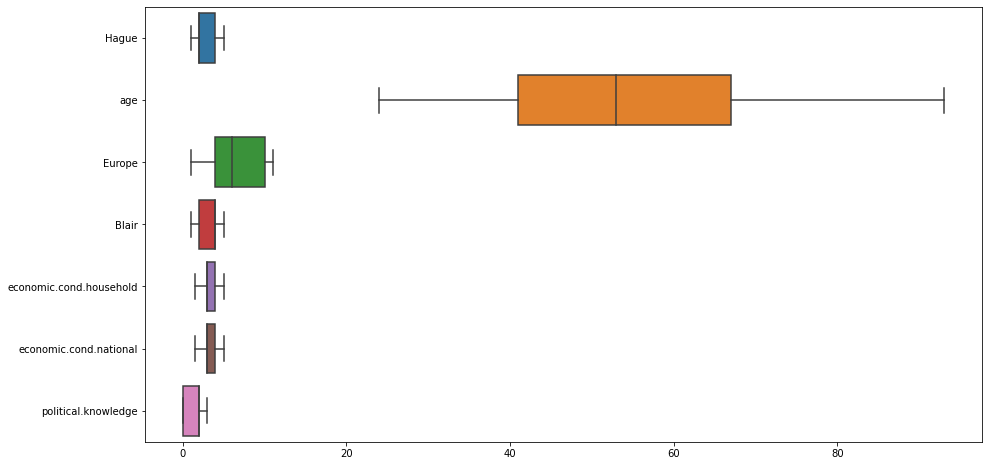

In [84]:
plt.figure(figsize=(15,8))  
sns.boxplot(data=df[['Hague','age','Europe','Blair','economic.cond.household','economic.cond.national',"political.knowledge"]] , orient='h')

## 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30). (4 Marks)

In [85]:
#cat1 = ['vote', 'gender']
#df =pd.get_dummies(df, columns=cat1,drop_first=True)
#df= df.rename(columns={'vote_Labour':'IsLabour_or_not' ,'gender_male':'Gender'},inplace= False)
#df.head()

In [86]:
for col in df.columns: 
    if df[col].dtype == 'object': 
        print('\n')
        print('Column Name:',col)
        print(pd.Categorical(df[col].unique()))
        print(pd.Categorical(df[col].unique()).codes)
        df[col] = pd.Categorical(df[col]).codes



Column Name: vote
['Labour', 'Conservative']
Categories (2, object): ['Conservative', 'Labour']
[1 0]


Column Name: gender
['female', 'male']
Categories (2, object): ['female', 'male']
[0 1]


In [87]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,1,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,1,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,1,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


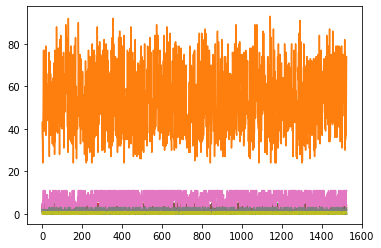

In [88]:
# before scaling 
plt.plot(df)
plt.show()

In [89]:
# Scaling the data

from scipy.stats import zscore
scaled_df=df.apply(zscore)
scaled_df.head()

#StandardScalar can also be used would give the same output more or less.

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.659692,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,0.659692,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,0.659692,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,0.659692,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,0.659692,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


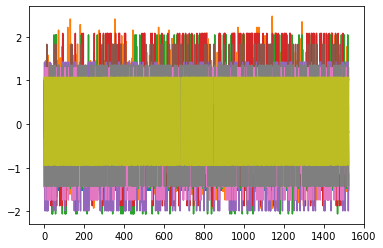

In [90]:
#after scaling
plt.plot(scaled_df)
plt.show()

Scaling is done so that the data which belongs to wide variety of range can be brought together in similar relative range and thus bringing out the best performance of the model.
Scaling also depends on the model we building. Usually, distance-based methods like KNN needs data to be scaled.

In [91]:
x=df.drop('vote',axis=1)
y=df['vote']

In [92]:
x_train,x_test, y_train, y_test=train_test_split(x,y,train_size=0.70, random_state=1)

In [93]:
y.value_counts(normalize = True)

1    0.69677
0    0.30323
Name: vote, dtype: float64

In [94]:
print(f"training set for independent variables is {x_train.shape}")
print(f"training set for dependent variables is {y_train.shape}")
print(f"test set for independent variables is {x_test.shape}")
print(f"test set for independent variables is {y_test.shape}")

training set for independent variables is (1061, 8)
training set for dependent variables is (1061,)
test set for independent variables is (456, 8)
test set for independent variables is (456,)


## 1.4 Apply Logistic Regression and LDA (linear discriminant analysis). (4 marks)

## Logistic Regression 

In [95]:
Logistic_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(x_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.4s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Logistic Train Set

In [96]:
y_train_predict=Logistic_model.predict(x_train)
Logistic_model_score=Logistic_model.score(x_train,y_train)
print(Logistic_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692 

[[197 110]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



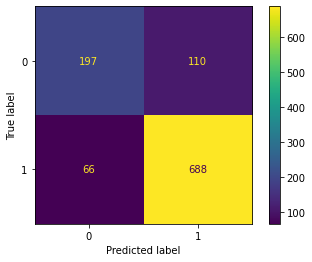

In [97]:
plot_confusion_matrix(Logistic_model,x_train,y_train)

In [98]:
y_train_prob=Logistic_model.predict_proba(x_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.933264,0.066736
1,0.095272,0.904728
2,0.293630,0.706370
3,0.112030,0.887970
4,0.016233,0.983767


AUC: 0.890


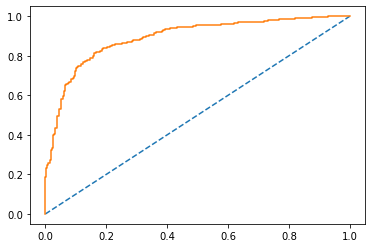

In [99]:
# predict probabilities
prob = Logistic_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)


### Logistic Test Set

In [100]:
y_test_predict=Logistic_model.predict(x_test)
Logistic_model_score=Logistic_model.score(x_test,y_test)
print(Logistic_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.8289473684210527 

[[111  42]
 [ 36 267]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



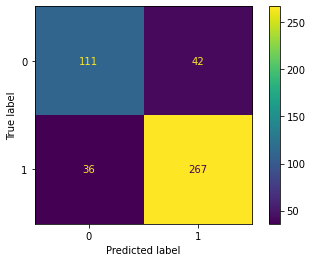

In [101]:
plot_confusion_matrix(Logistic_model,x_test,y_test)

In [102]:
y_test_prob=Logistic_model.predict_proba(x_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


AUC: 0.883


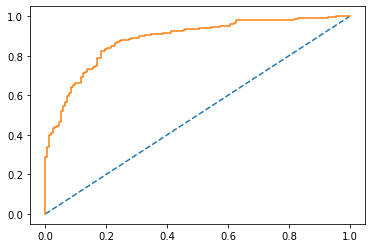

In [103]:
# predict probabilities
prob = Logistic_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

## Linear Discriminant Analysis(LDA)

In [104]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

### LDA Train Set

In [105]:
y_train_predict=LDA_model.predict(x_train)
LDA_model_score=LDA_model.score(x_train,y_train)
print(LDA_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692 

[[200 107]
 [ 69 685]] 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



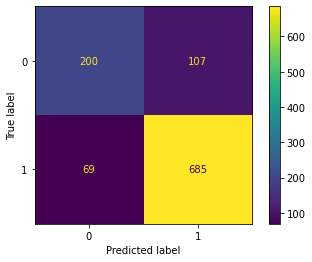

In [106]:
plot_confusion_matrix(LDA_model,x_train,y_train)

AUC: 0.890


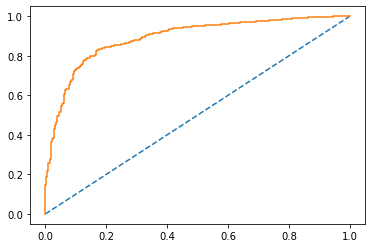

In [107]:
# predict probabilities
prob = LDA_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### LDA Test Set

In [108]:
y_test_predict=LDA_model.predict(x_test)
LDA_model_score=LDA_model.score(x_test,y_test)
print(LDA_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.831140350877193 

[[111  42]
 [ 35 268]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



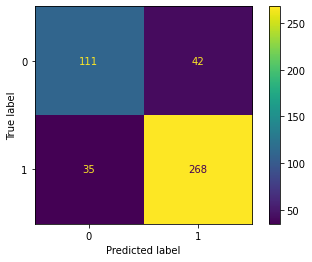

In [109]:
plot_confusion_matrix(LDA_model,x_test,y_test)

AUC: 0.888


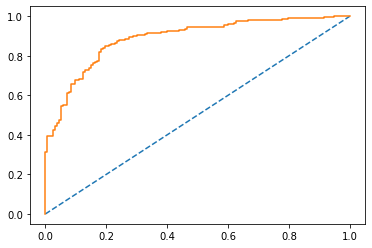

In [110]:
# predict probabilities
prob = LDA_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

## 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results. (4 marks)

### Naive Bayes

In [111]:
NB_model=GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

### NB Train Set

In [112]:
Y_train_predict=NB_model.predict(x_train)
model_score=NB_model.score(x_train, y_train)
print(model_score,'\n')
print(metrics.confusion_matrix(y_train,Y_train_predict),'\n')

print(metrics.classification_report(y_train,Y_train_predict))

0.8341187558906692 

[[212  95]
 [ 81 673]] 

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



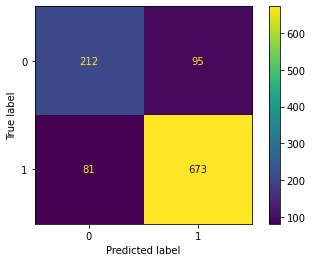

In [113]:
plot_confusion_matrix(NB_model,x_train,y_train)

AUC: 0.889


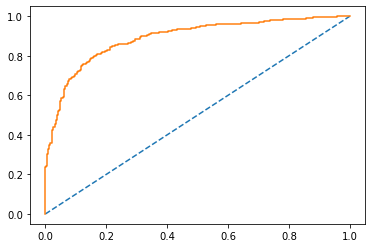

In [114]:
# predict probabilities
prob = NB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### NB Test Set

In [115]:
y_test_predict=NB_model.predict(x_test)
NB_model_score=NB_model.score(x_test,y_test)
print(NB_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315 

[[112  41]
 [ 40 263]] 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



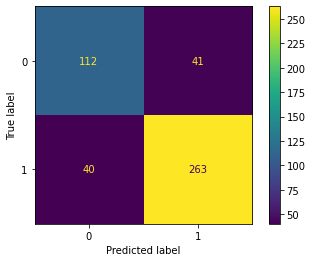

In [116]:
plot_confusion_matrix(NB_model,x_test,y_test)

AUC: 0.876


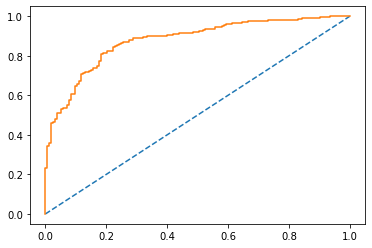

In [117]:
# predict probabilities
prob = NB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

## KNN

In [118]:
#sc_x = x.apply(zscore) #scaling only train set

In [119]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

### KNN TRain Set

In [120]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.8576814326107446 

[[210  97]
 [ 54 700]] 

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



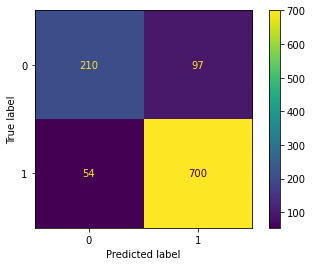

In [121]:
plot_confusion_matrix(KNN_model,x_train,y_train)

AUC: 0.926


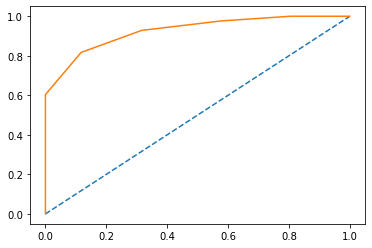

In [122]:
# predict probabilities
prob = KNN_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### KNN Test Set

In [123]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test, y_test)
print(KNN_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315 

[[100  53]
 [ 28 275]] 

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



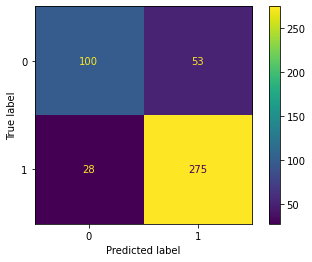

In [124]:
plot_confusion_matrix(KNN_model,x_test,y_test)

AUC: 0.861


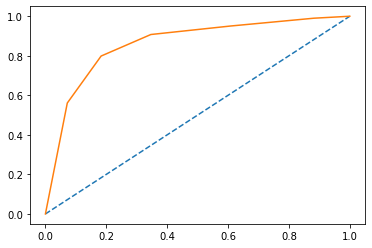

In [125]:
# predict probabilities
prob = KNN_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

## 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. (7 marks)

### Bagging

In [126]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

cart=RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100, random_state=1)

Bagging_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=100,
                  random_state=1)

### Bagging Train Set

In [127]:
y_train_predict=Bagging_model.predict(x_train)
Bagging_model_score=Bagging_model.score(x_train,y_train)
print(Bagging_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.9679547596606974 

[[277  30]
 [  4 750]] 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061



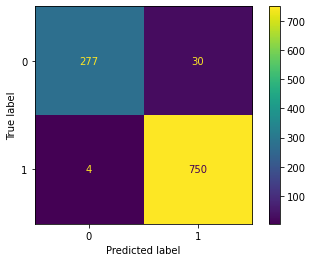

In [128]:
plot_confusion_matrix(Bagging_model,x_train,y_train)

AUC: 0.997


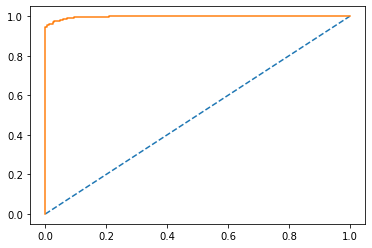

In [129]:
# predict probabilities
prob = Bagging_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### Bagging Test Set

In [130]:
y_test_predict=Bagging_model.predict(x_test)
Bagging_model_score=Bagging_model.score(x_test,y_test)
print(Bagging_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.8289473684210527 

[[104  49]
 [ 29 274]] 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



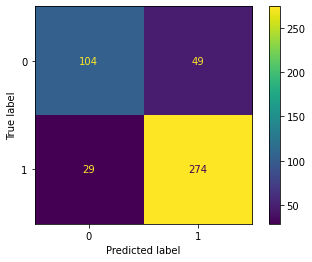

In [131]:
plot_confusion_matrix(Bagging_model,x_test,y_test)

AUC: 0.897


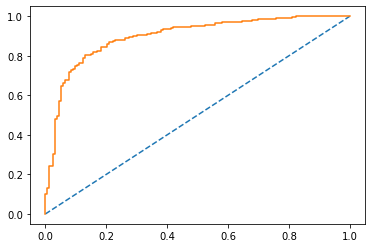

In [132]:
# predict probabilities
prob = Bagging_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

# Boosting

## Ada Boost

In [133]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

## Ada Train Set

In [134]:
y_train_predict=ADB_model.predict(x_train)
ADB_model_score=ADB_model.score(x_train,y_train)
print(ADB_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.8501413760603205 

[[214  93]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



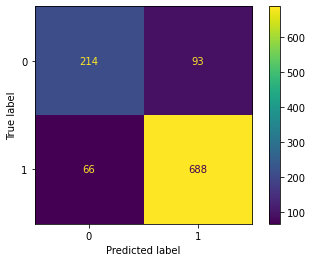

In [135]:
plot_confusion_matrix(ADB_model,x_train,y_train)

AUC: 0.915


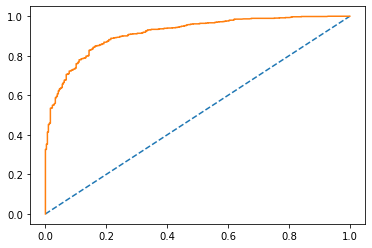

In [136]:
# predict probabilities
prob = ADB_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### ADB Test Set

In [137]:
y_test_predict = ADB_model.predict(x_test)
ADB_model_score = ADB_model.score(x_test, y_test)
print(ADB_model_score,'\n')
print(metrics.confusion_matrix(y_test, y_test_predict),'\n')
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702 

[[103  50]
 [ 35 268]] 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



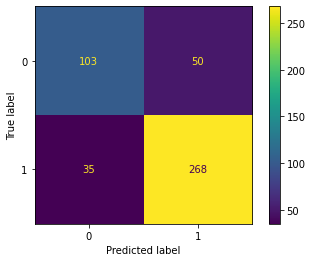

In [138]:
plot_confusion_matrix(ADB_model,x_test,y_test)

AUC: 0.877


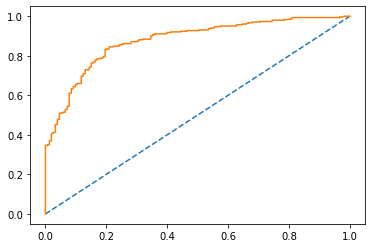

In [139]:
# predict probabilities
prob = ADB_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

### Gradient Boosting 

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model=GradientBoostingClassifier(random_state=1)
gbc_model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=1)

### Gradient Train Set

In [141]:
y_train_predict = gbc_model.predict(x_train)
gbc_model_score = gbc_model.score(x_train, y_train)
print(gbc_model_score,'\n')
print(metrics.confusion_matrix(y_train, y_train_predict),'\n')
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562 

[[239  68]
 [ 46 708]] 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



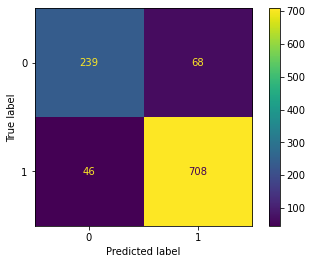

In [142]:
plot_confusion_matrix(gbc_model,x_train,y_train)

AUC: 0.951


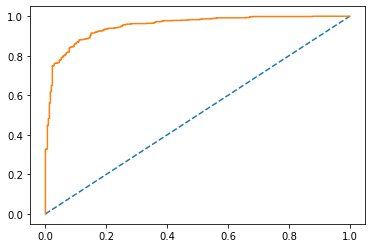

In [143]:
# predict probabilities
prob = gbc_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)

### Gradient Test Set

In [144]:
y_test_predict = gbc_model.predict(x_test)
gbc_model_score = gbc_model.score(x_test, y_test)
print(gbc_model_score,'\n')
print(metrics.confusion_matrix(y_test, y_test_predict),'\n')
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737 

[[105  48]
 [ 27 276]] 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



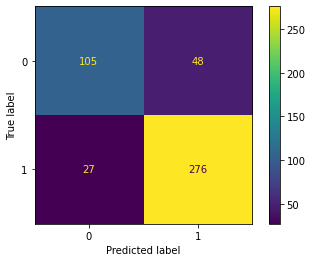

In [145]:
plot_confusion_matrix(gbc_model,x_test,y_test)

AUC: 0.899


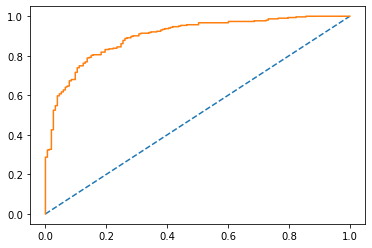

In [146]:
# predict probabilities
prob = gbc_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

 # now we will tune every model to check for better results

In [147]:
x1=scaled_df.drop('vote',axis=1)
y1=scaled_df['vote']

In [148]:
x1_train,x1_test, y1_train, y1_test=train_test_split(x1,y1,train_size=0.70, random_state=1)

# Tuned Logistic Regression

## Train Set

In [149]:
grid = {'penalty':['l2','none'],
       'solver': ['sag','lbfgs'],
       'tol': [0.0001,0.00001]
       }
Logistic_model = LogisticRegression( max_iter = 1000, random_state=1)
grid_search = GridSearchCV(estimator = Logistic_model, param_grid = grid ,cv = 3, n_jobs= 2, scoring= 'f1')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=1),
             n_jobs=2,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [150]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, random_state=1)


In [151]:
best_model = grid_search.best_estimator_

In [152]:
ytrain_predict = best_model.predict(x_train)
ytest_predict = best_model.predict(x_test)

In [153]:
ytest_predict_prob = best_model.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.425957,0.574043
1,0.153047,0.846953
2,0.006707,0.993293
3,0.839466,0.160534
4,0.065100,0.934900


In [154]:
y_train_predict=best_model.predict(x_train)
Logistic_model_score=best_model.score(x_train,y_train)
print(Logistic_model_score,'\n')

print(metrics.confusion_matrix(y_train,y_train_predict),'\n')
print(metrics.classification_report(y_train,y_train_predict))

0.8341187558906692 

[[197 110]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



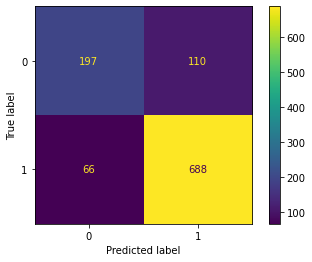

In [155]:
plot_confusion_matrix(best_model,x_train,y_train)

AUC: 0.890


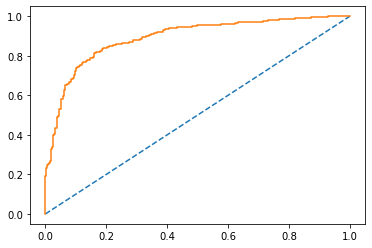

In [156]:
# predict probabilities
prob = best_model.predict_proba(x_train)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_train,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
train_fpr,train_tpr, train_threshols = roc_curve(y_train,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(train_fpr,train_tpr)


## Test Set

In [157]:
y_test_predict=best_model.predict(x_test)
Logistic_model_score=best_model.score(x_test,y_test)
print(Logistic_model_score,'\n')

print(metrics.confusion_matrix(y_test,y_test_predict),'\n')
print(metrics.classification_report(y_test,y_test_predict))

0.8289473684210527 

[[111  42]
 [ 36 267]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



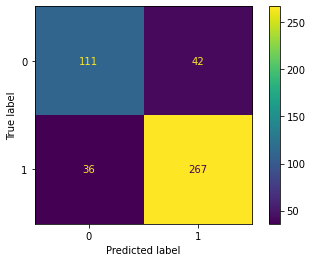

In [158]:
plot_confusion_matrix(best_model,x_test,y_test)

AUC: 0.883


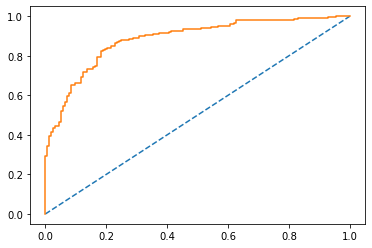

In [159]:
# predict probabilities
prob = best_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
prob = prob[:,1]
# calculate AUC
auc = roc_auc_score(y_test,prob)
print('AUC: %.3f' % auc)

# calculate roc curve
test_fpr,test_tpr, test_threshols = roc_curve(y_test,prob)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the roc curve for the model
plt.plot(test_fpr,test_tpr)

# Tuned KNN

In [160]:
KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [161]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8501413760603205
[[204 103]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [162]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315
[[ 98  55]
 [ 26 277]]
              precision    recall  f1-score   support

           0       0.79      0.64      0.71       153
           1       0.83      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [163]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

In [164]:
y_train_predict=KNN_model.predict(x_train)
KNN_model_score=KNN_model.score(x_train,y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.8576814326107446
[[210  97]
 [ 54 700]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



In [165]:
y_test_predict=KNN_model.predict(x_test)
KNN_model_score=KNN_model.score(x_test,y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8223684210526315
[[100  53]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456



In [166]:
ac_score=[]

for k in range(1,20,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores=knn.score(x_test,y_test)
    ac_score.append(scores)
    
MCE=[1-x for x in ac_score]
MCE

[0.2171052631578947,
 0.20833333333333337,
 0.17763157894736847,
 0.17763157894736847,
 0.19298245614035092,
 0.19517543859649122,
 0.1907894736842105,
 0.19298245614035092,
 0.19956140350877194,
 0.19736842105263153]

the auc curve for train 0.888 


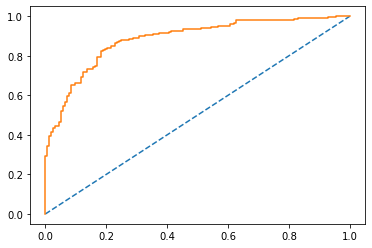

In [167]:
probs_train=knn.predict_proba(x_train)
probs_train=probs_train[:,1]
auc=roc_auc_score(y_train,probs_train)
print("the auc curve for train %.3f " % auc)

train_fpr,train_tpr,train_threshold=roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

the auc curve for test 0.871 


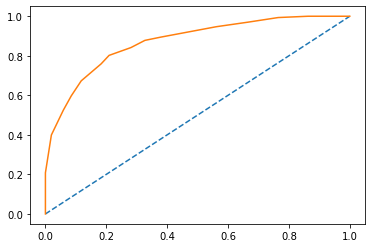

In [168]:
probs_test=knn.predict_proba(x_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("the auc curve for test %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr)

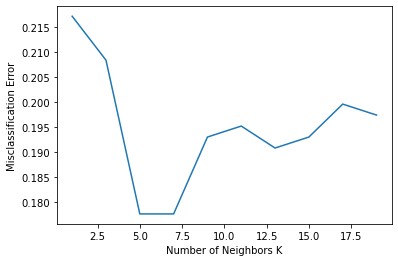

In [169]:
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# tuned Ada Boost

In [170]:
from sklearn.tree import DecisionTreeClassifier

# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=20, random_state=1)

In [171]:
y_test_predict=abc_tuned.predict(x_test)
ADA_model_score=abc_tuned.score(x_test,y_test)
print(ADA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.7785087719298246
[[ 63  90]
 [ 11 292]]
              precision    recall  f1-score   support

           0       0.85      0.41      0.56       153
           1       0.76      0.96      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.69      0.70       456
weighted avg       0.79      0.78      0.75       456



In [172]:
y_train_predict=abc_tuned.predict(x_train)
ADA_model_score=abc_tuned.score(x_train,y_train)
print(ADA_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.7945334590009425
[[ 63  90]
 [ 11 292]]
              precision    recall  f1-score   support

           0       0.85      0.41      0.56       153
           1       0.76      0.96      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.69      0.70       456
weighted avg       0.79      0.78      0.75       456



# Tuned Gradient Boost

In [173]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=1, random_state=1, subsample=1)

In [174]:
y_train_predict=gbc_tuned.predict(x_train)
Grad_model_score=gbc_tuned.score(x_train,y_train)
print(Grad_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8765315739868049
[[ 63  90]
 [ 11 292]]
              precision    recall  f1-score   support

           0       0.85      0.41      0.56       153
           1       0.76      0.96      0.85       303

    accuracy                           0.78       456
   macro avg       0.81      0.69      0.70       456
weighted avg       0.79      0.78      0.75       456



In [175]:
y_test_predict=gbc_tuned.predict(x_test)
Grad_model_score=gbc_tuned.score(x_test,y_test)
print(Grad_model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.8377192982456141
[[106  47]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.83      0.80      0.81       456
weighted avg       0.84      0.84      0.83       456



# 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized. (7 marks)

Logistic Regression 

TRAIN SET:

0.8341187558906692 

[[197 110]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


TEST SET:

0.8289473684210527 

[[111  42]
 [ 36 267]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456





LDA

TRAIN SET:

0.8341187558906692 

[[200 107]
 [ 69 685]] 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


TEST SET:

0.831140350877193 

[[111  42]
 [ 35 268]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456





Naive Bayes

TRAIN SET:

0.8341187558906692 

[[212  95]
 [ 81 673]] 

              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061


TEST SET:

0.8223684210526315 

[[112  41]
 [ 40 263]] 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456




KNN (simple)

TRAIN SET:

0.8576814326107446 

[[210  97]
 [ 54 700]] 

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       307
           1       0.88      0.93      0.90       754

    accuracy                           0.86      1061
   macro avg       0.84      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

TEST SET:

0.8223684210526315 

[[100  53]
 [ 28 275]] 

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       153
           1       0.84      0.91      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.78      0.79       456
weighted avg       0.82      0.82      0.82       456





Bagging

TRAIN SET:

0.9679547596606974 

[[277  30]
 [  4 750]] 

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       307
           1       0.96      0.99      0.98       754

    accuracy                           0.97      1061
   macro avg       0.97      0.95      0.96      1061
weighted avg       0.97      0.97      0.97      1061

TEST SET:

0.8289473684210527 

[[104  49]
 [ 29 274]] 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       153
           1       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456








BOOSTING:

ADA BOOST

TRAIN SET:

0.8501413760603205 

[[214  93]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061


TEST SET:

0.8135964912280702 

[[103  50]
 [ 35 268]] 

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



GRADIENT BOOST

TRAIN SET:

0.8925541941564562 

[[239  68]
 [ 46 708]] 

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061


TEST SET:

0.8355263157894737 

[[105  48]
 [ 27 276]] 

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456





Post-TUNING

Logistic Regress

TRAIN SET:

0.8341187558906692 

[[197 110]
 [ 66 688]] 

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061


TEST SET:

0.8289473684210527 

[[111  42]
 [ 36 267]] 

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456




# Problem 2

## In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

1.President Franklin D. Roosevelt in 1941
2.President John F. Kennedy in 1961
3.President Richard Nixon in 1973

## 2.1 Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts)

In [176]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
s1=inaugural.words('1941-Roosevelt.txt')
s2=inaugural.raw('1961-Kennedy.txt')
s3=inaugural.raw('1973-Nixon.txt')
nltk.download('stopwords')
nltk.download('punkt')
import string
import random

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\randy\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\randy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\randy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [177]:
s1

['On', 'each', 'national', 'day', 'of', 'inauguration', ...]

In [178]:
print('Number of words in Roosevelt speech:', len(inaugural.words('1941-Roosevelt.txt')))

Number of words in Roosevelt speech: 1536


In [5]:
print('Number of words in Nixon speech:', len(inaugural.words('1973-Nixon.txt')))

Number of words in Nixon speech: 2028


In [6]:
print('Number of words in Kennedy  speech:', len(inaugural.words('1961-Kennedy.txt')))

Number of words in Kennedy  speech: 1546


In [7]:
print('Number of characters in Roosevelt speech:', len(inaugural.raw('1941-Roosevelt.txt')))

Number of characters in Roosevelt speech: 7571


In [8]:
print('Number of characters in Nixon speech:', len(inaugural.raw('1973-Nixon.txt')))

Number of characters in Nixon speech: 9991


In [9]:
print('Number of characters in Kennedy speech:',len(inaugural.raw('1961-Kennedy.txt')))

Number of characters in Kennedy speech: 7618


In [10]:
print('Number of sentences in Roosevelt speech:',len(inaugural.sents('1941-Roosevelt.txt')))

Number of sentences in Roosevelt speech: 68


In [11]:
print('Number of sentences in Nixon speech:',len(inaugural.sents('1973-Nixon.txt')))

Number of sentences in Nixon speech: 69


In [12]:
print('Number of sentences in Kennedy speech:',len(inaugural.sents('1961-Kennedy.txt')))

Number of sentences in Kennedy speech: 52


## 2.2) Remove all the stopwords from the three speeches. Show the word count before and after the removal of stopwords. Show a sample sentence after the removal of stopwords.

In [13]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)+['--']


all_words = (w.lower() for w in inaugural.words('1941-Roosevelt.txt'))
all_words_clean_R = [word for word in all_words if word not in stopwords]



all_words_freq_R = nltk.FreqDist(all_words_clean_R)

word_features_R = [item[0] for item in all_words_freq_R.most_common(3)]

In [14]:
print("Word count after cleaning Roosevelt speech:",len(all_words_clean_R))

Word count after cleaning Roosevelt speech: 632


In [15]:
all_words_clean_R

['national',
 'day',
 'inauguration',
 'since',
 '1789',
 'people',
 'renewed',
 'sense',
 'dedication',
 'united',
 'states',
 'washington',
 'day',
 'task',
 'people',
 'create',
 'weld',
 'together',
 'nation',
 'lincoln',
 'day',
 'task',
 'people',
 'preserve',
 'nation',
 'disruption',
 'within',
 'day',
 'task',
 'people',
 'save',
 'nation',
 'institutions',
 'disruption',
 'without',
 'us',
 'come',
 'time',
 'midst',
 'swift',
 'happenings',
 'pause',
 'moment',
 'take',
 'stock',
 'recall',
 'place',
 'history',
 'rediscover',
 'may',
 'risk',
 'real',
 'peril',
 'inaction',
 'lives',
 'nations',
 'determined',
 'count',
 'years',
 'lifetime',
 'human',
 'spirit',
 'life',
 'man',
 'three',
 'score',
 'years',
 'ten',
 'little',
 'little',
 'less',
 'life',
 'nation',
 'fullness',
 'measure',
 'live',
 'men',
 'doubt',
 'men',
 'believe',
 'democracy',
 'form',
 'government',
 'frame',
 'life',
 'limited',
 'measured',
 'kind',
 'mystical',
 'artificial',
 'fate',
 'unexplai

In [16]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)+['--']


all_words = (w.lower() for w in inaugural.words('1961-Kennedy.txt'))
all_words_clean_K = [word for word in all_words if word not in stopwords]



all_words_freq_K = nltk.FreqDist(all_words_clean_K)

word_features_K= [item[0] for item in all_words_freq_K.most_common(3)]

In [17]:
print("Word count after cleaning Kennedy speech:",len(all_words_clean_K))

Word count after cleaning Kennedy speech: 697


In [18]:
all_words_clean_K

['vice',
 'president',
 'johnson',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'president',
 'eisenhower',
 'vice',
 'president',
 'nixon',
 'president',
 'truman',
 'reverend',
 'clergy',
 'fellow',
 'citizens',
 'observe',
 'today',
 'victory',
 'party',
 'celebration',
 'freedom',
 'symbolizing',
 'end',
 'well',
 'beginning',
 'signifying',
 'renewal',
 'well',
 'change',
 'sworn',
 'almighty',
 'god',
 'solemn',
 'oath',
 'forebears',
 'l',
 'prescribed',
 'nearly',
 'century',
 'three',
 'quarters',
 'ago',
 'world',
 'different',
 'man',
 'holds',
 'mortal',
 'hands',
 'power',
 'abolish',
 'forms',
 'human',
 'poverty',
 'forms',
 'human',
 'life',
 'yet',
 'revolutionary',
 'beliefs',
 'forebears',
 'fought',
 'still',
 'issue',
 'around',
 'globe',
 'belief',
 'rights',
 'man',
 'come',
 'generosity',
 'state',
 'hand',
 'god',
 'dare',
 'forget',
 'today',
 'heirs',
 'first',
 'revolution',
 'let',
 'word',
 'go',
 'forth',
 'time',
 'place',
 'friend',
 'foe',
 'alike'

In [19]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)+['--']


all_words = (w.lower() for w in inaugural.words('1973-Nixon.txt'))
all_words_clean_N = [word for word in all_words if word not in stopwords]



all_words_freq_N = nltk.FreqDist(all_words_clean_N)

word_features_N = [item[0] for item in all_words_freq_N.most_common(3)]

In [20]:
print("Word count after cleaning Nixon speech:",len(all_words_clean_N))

Word count after cleaning Nixon speech: 836


In [21]:
all_words_clean_N

['mr',
 'vice',
 'president',
 'mr',
 'speaker',
 'mr',
 'chief',
 'justice',
 'senator',
 'cook',
 'mrs',
 'eisenhower',
 'fellow',
 'citizens',
 'great',
 'good',
 'country',
 'share',
 'together',
 'met',
 'four',
 'years',
 'ago',
 'america',
 'bleak',
 'spirit',
 'depressed',
 'prospect',
 'seemingly',
 'endless',
 'war',
 'abroad',
 'destructive',
 'conflict',
 'home',
 'meet',
 'today',
 'stand',
 'threshold',
 'new',
 'era',
 'peace',
 'world',
 'central',
 'question',
 'us',
 'shall',
 'use',
 'peace',
 'let',
 'us',
 'resolve',
 'era',
 'enter',
 'postwar',
 'periods',
 'often',
 'time',
 'retreat',
 'isolation',
 'leads',
 'stagnation',
 'home',
 'invites',
 'new',
 'danger',
 'abroad',
 'let',
 'us',
 'resolve',
 'become',
 'time',
 'great',
 'responsibilities',
 'greatly',
 'borne',
 'renew',
 'spirit',
 'promise',
 'america',
 'enter',
 'third',
 'century',
 'nation',
 'past',
 'year',
 'saw',
 'far',
 'reaching',
 'results',
 'new',
 'policies',
 'peace',
 'continuing',


## 2.3) Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [22]:
all_words_freq_R

FreqDist({'nation': 12, 'know': 10, 'spirit': 9, 'life': 9, 'democracy': 9, 'us': 8, 'people': 7, 'america': 7, 'years': 6, 'freedom': 6, ...})

In [23]:
word_features_R

['nation', 'know', 'spirit']

In [24]:
all_words_freq_N

FreqDist({'us': 26, 'let': 22, 'america': 21, 'peace': 19, 'world': 18, 'new': 15, 'nation': 11, 'responsibility': 11, 'government': 10, 'great': 9, ...})

In [25]:
word_features_N

['us', 'let', 'america']

In [26]:
all_words_freq_K

FreqDist({'let': 16, 'us': 12, 'world': 8, 'sides': 8, 'new': 7, 'pledge': 7, 'citizens': 5, 'power': 5, 'shall': 5, 'free': 5, ...})

In [27]:
word_features_K

['let', 'us', 'world']

## 2.4) Plot the word cloud of each of the three speeches. (after removing the stopwords)

In [28]:
wc1 = ' '.join(all_words_clean_R)

In [29]:
wc1

'national day inauguration since 1789 people renewed sense dedication united states washington day task people create weld together nation lincoln day task people preserve nation disruption within day task people save nation institutions disruption without us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man three score years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought us greater security hope better understanding life ideals measured material things

In [30]:
wc2 = ' '.join(all_words_clean_N)

In [31]:
wc2

'mr vice president mr speaker mr chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question us shall use peace let us resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad let us resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw far reaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world america bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations

In [32]:
wc3 = ' '.join(all_words_clean_K)

In [33]:
wc3

'vice president johnson mr speaker mr chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution let word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world let every nation know whether wishes us well ill shall pay price bear burden meet hardship support friend oppose foe order assure survival 

Word Cloud for Roosevelt(after cleaning)


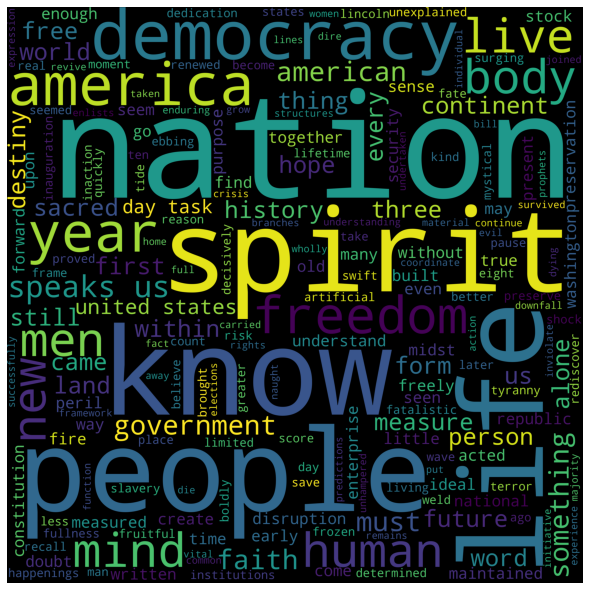

In [34]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Roosevelt(after cleaning)")
plt.show()

Word Cloud for Nixon (after cleaning)!!


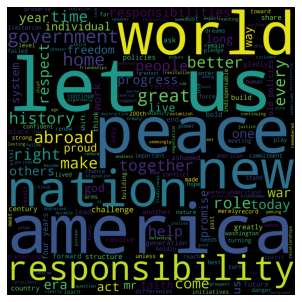

In [35]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc2) 
  
# plot the WordCloud image                        
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Nixon (after cleaning)!!")
plt.show()

Word Cloud for Kennedy  (after cleaning)!!


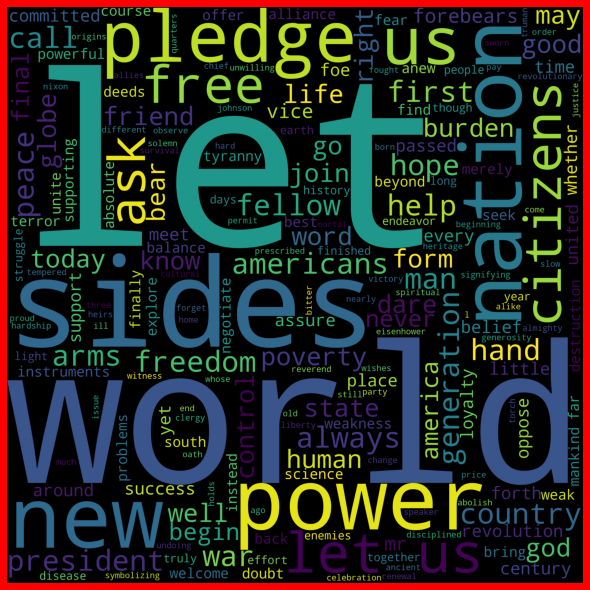

In [36]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc3) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = 'red') 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Kennedy  (after cleaning)!!")
plt.show()